<h1 style="color:blue; text-align:center"><b><em>Анализ тенденций и поведенческих предпочтений покупательского спроса клиентов (поиск инсайтов, составление рекомендаций стейкхолдерам)</em></b></h1>

In [1]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# подклюаем бибилиотеки, необходимые для анализа
import pandas as pd     # библиотека для обработки и анализа данных
import psycopg2 as db    # подключение к БД
import matplotlib.pyplot as plt    # Для построения визуализаций
import seaborn as sns     # расширяет библиотеку matplotlib.pyplot
import numpy as np        # поддержка высокоуровневых мат. функций

In [3]:
# подключаемся к локальной Postgresql БД 
database_type = 'postgresql'
host='localhost'
port='5432'
user = 'postgres'
password = '1234'
database_name='postgres'
# строка подключения
connection_string = f"{database_type}://{user}:{password}@{host}:{port}/{database_name}"
# пишу спец. конструкцию для отлова ошибок
try:   # "попытаться"
  connection = db.connect(connection_string)
  cursor = connection.cursor()
  print("Database connection was successfull")
except Exception as error:   # если в блоке try произойдет ошибка, то вызовется этот блок
  print("Connetion to database has failed")
  print("Error", error)



Database connection was successfull


In [4]:
# Обращаюсь к конкретной таблице в БД: просматриваю Датафрейм
df = pd.read_sql('select * from shopping_trends_updated', connection_string)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Смотрю названия столбцов, их типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<h4><i>Customer ID - Уникальный идентификатор для каждого клиента <br>
Age - Возраст клиента <br>
Gender - Пол клиента (мужчина/женщина) <br>
Item Purchased - Наименование товара, купленного клиентом <br>
Category - Категория купленного товара <br>
Purchase Amount (USD) - Сумма покупки в долларах США <br>
Location - Место, где была совершена покупка <br>
Size - Размер купленного товара <br>
Color - Цвет купленного товара <br>
Season - Сезон, в течение которого была совершена покупка <br>
Review Rating - Оценка, данная покупателем приобретенному товару <br>
Subscription Status - Наличие подписки у клиента (Да/Нет) <br>
Payment Method - Тип оплаты, выбранный клиентом <br>
Shipping Type - Тип доставки, выбранный клиентом <br>
Discount Applied - Применение скидки к покупке (Да/Нет) <br>
Promo Code Used - Использование промокода при покупке (Да/Нет) <br>
Previous Purchases - Сумма предыдущих транзакций, совершенных покупателем в магазине, за исключением текущей <br>
Preferred Payment Method - Наиболее предпочтительный для клиента способ оплаты <br>
Frequency of Purchases - Частота, с которой клиент совершает покупки</i></h4>

<h2 style="text-align:center"><b>Поиск аномалий в данных</b></h2>

In [6]:
# Просматриваем данные о покупках на наличие аномалий: группирую данные по наименованиям товаров и полу клиентов, считаю количество купленных товаров
item_gender=df.groupby(['Item Purchased','Gender'])['Customer ID'].count()
item_gender.head(50)

Item Purchased  Gender
Backpack        Female     37
                Male      106
Belt            Female     55
                Male      106
Blouse          Female     66
                Male      105
Boots           Female     50
                Male       94
Coat            Female     47
                Male      114
Dress           Female     52
                Male      114
Gloves          Female     37
                Male      103
Handbag         Female     58
                Male       95
Hat             Female     52
                Male      102
Hoodie          Female     51
                Male      100
Jacket          Female     54
                Male      109
Jeans           Female     29
                Male       95
Jewelry         Female     52
                Male      119
Pants           Female     48
                Male      123
Sandals         Female     59
                Male      101
Scarf           Female     45
                Male      112
Shirt           F

<h4 style="text-align:justify"><i>В датасете присутствуют аномалии при анализе текстовых данных: мужчины приобретали, помимо мужских, женские товары (юбки - 109 шт., платья - 114 шт. и блузки - 105 шт.). Несмотря на то, что теоретически представители мужского пола могли покупать эти вещи женщинам, такие данные могут исказить результаты исследования, поэтому противоречивые записи в анализе учтены не будут. </i></h4>

<h2 style="text-align:center"><b>Удаление записей, которые могут исказить результаты иссдледования</b></h2>

In [7]:
# Исключение записей с женскими товарами, которые были приобретены мужчиами: юбки, платья и блузки
df = df[~(df['Item Purchased'].isin(['Dress','Skirt','Blouse'])  &  (df['Gender'] == 'Male'))]
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000
mean,2002.678891,44.025756,59.772676,3.750756,25.269877
std,1138.419113,15.157491,23.535797,0.719829,14.506923
min,2.000000,18.000000,20.000000,2.500000,1.000000
25%,1006.750000,31.000000,39.000000,3.100000,13.000000
50%,2029.500000,44.000000,60.000000,3.800000,25.000000
75%,3007.250000,57.000000,80.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
# Проверка на отсутствие пустых значений
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
# Проверка на наличие дубликатов
df.duplicated().sum()

0

In [10]:
# Определяем экстремум и эквантиды значений, а также ср. значения, кол-во не нулевых записей и стандартное отклонение
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000
mean,2002.678891,44.025756,59.772676,3.750756,25.269877
std,1138.419113,15.157491,23.535797,0.719829,14.506923
min,2.000000,18.000000,20.000000,2.500000,1.000000
25%,1006.750000,31.000000,39.000000,3.100000,13.000000
50%,2029.500000,44.000000,60.000000,3.800000,25.000000
75%,3007.250000,57.000000,80.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
# Изучаем нечисловые значеня таблиц: кол-во уникальных значений и моду
df.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3572,3572,3572,3572,3572,3572,3572,3572,3572,3572,3572,3572,3572
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Pants,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2324,171,1409,92,1617,168,908,2634,630,2089,2089,620,533


<h2 style="text-align:center"><b> Графическое представление распределения числовых данных столбца "Purchase Amount (USD)" по их квартилям.</b></h2>

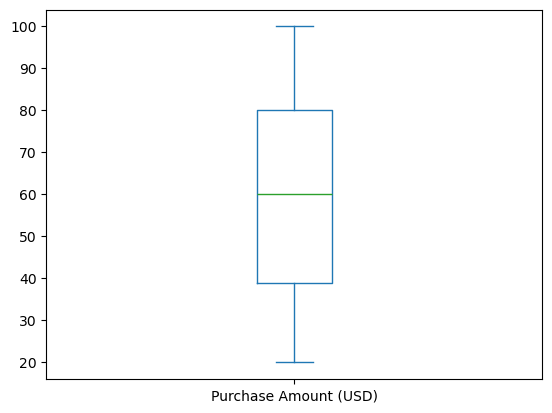

In [12]:
# Строим "ящик с усами". Видим, что он ярковыраженных выбросов не имеет 
df['Purchase Amount (USD)'].plot(kind='box')   # метод plot - выбираю тип графика
plt.show()      # команда, чтобы отобразить график

<h2 style="text-align:center"><b>Гистограммы распределения данных</b></h2>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Purchase Amount (USD)'}>],
       [<Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Previous Purchases'}>]], dtype=object)

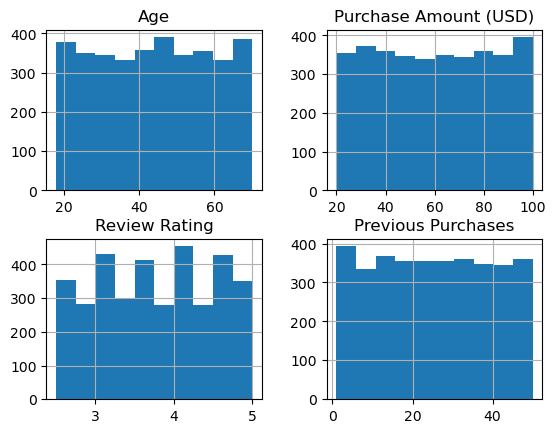

In [13]:
# Строим гистограммы распределения данных по столбцам, имеющим числовые значения
df.hist(column=['Age','Purchase Amount (USD)','Review Rating','Previous Purchases'])

<h4 style="text-align:justify"><i>Гистограммы распределения данных по столбцам, имеющим числовые значения: «Age», «Purchase Amount (USD)», «Review Rating» и «Previous Purchases» свидетельствуют о равномерном распределении, без выраженных отклонений. </i></h4>

<h2 style="text-align:center"><b>Секторная диаграмма соотношения клиентов по гендеру</b></h2>

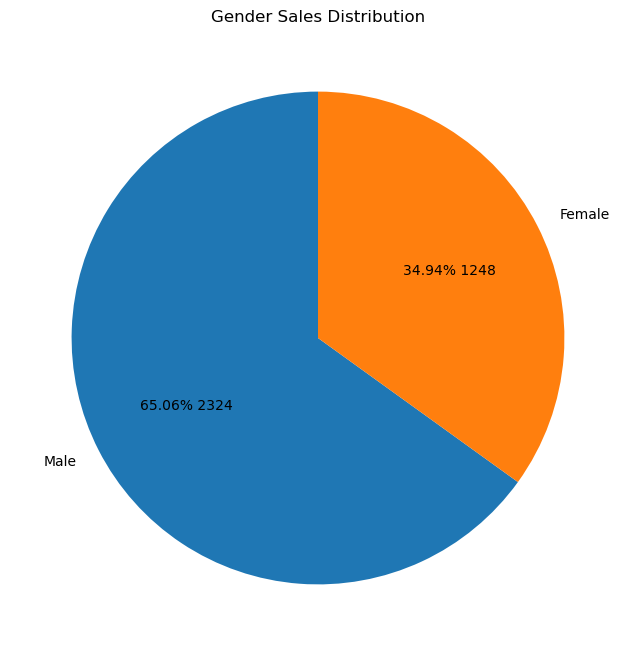

In [14]:
# Задаем размер диаграммы
plt.figure(figsize=(8, 8))
# Высчитываем количество строк по полу с помощью метода value_counts(), он берет каждое уникальное значение и подсчитывает их количество
genders=df.groupby('Gender').value_counts()
# Создаем функцию с f-стокой, меняем форматы чисел
def func(p):
    return f'{p:.2f}% {(p/100)*genders.sum():.0f}'
# Строим диаграмму на основе полученых значений
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].unique(), autopct=func, startangle=90)     # autopct -  подписывает все области на диаграмме, startangle - стартовый угол  
# Задаем заголовок
plt.title('Gender Sales Distribution')
# Отображаем график
plt.show()

<h4 style="text-align:justify"><i>Секторная диаграмма соотношения клиентов по гендеру свидетельствует о том, что большая часть клиентов – мужчины (65%).</i></h4>

<h2 style="text-align:center"><b>Распределение суммы покупок по возрастным группам и полу покупателей</b></h2>

In [15]:
# Задаем возрастные категории и заносим их в отдельный столбец age_categories
# создаем функцию age_categories, принимающую возраст и возвращающую возрастные группы
def age_categories(param):
    if param <= 20:
        return 'Teenagers'    # Подростки
    if param <= 35:
        return 'Adults'      # Взрослые
    if param <= 54:    
        return 'Mature'      # Зрелые
    if param <= 64:
        return 'Elders'      # Люди в предпенсионном возрасте
    else:
        return 'Retire'      # Пенсионеры
# Добавляем столбец с возрастными группами в датафрейм
df['age_categories']=df['Age'].apply(age_categories)

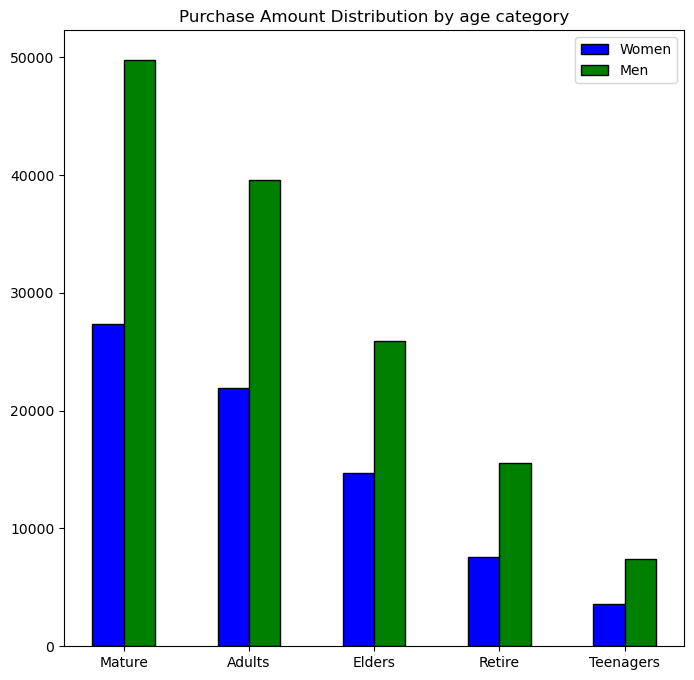

In [16]:
# Смотрим суммарное значение покупок с группировкой по возрастным группам и полу для определения самого прибыльного сегмента
PA_by_age_gender_m=df[df['Gender'] == 'Male'].groupby('age_categories')["Purchase Amount (USD)"].sum().sort_values(ascending=0)  # sort_values(ascending=0) - сортируем по убыванию
PA_by_age_gender_f=df[df['Gender'] == 'Female'].groupby('age_categories')["Purchase Amount (USD)"].sum().sort_values(ascending=0)  # sort_values(ascending=0) - сортируем по убыванию
# Строим диаграмму на основе полученых значений
# При помощи метода figure задаю размеры графика
plt.figure(figsize=(8, 8))
# задаю количество рядов
r = np.arange(5) 
# Определяю ширину рядов
width = 0.25
  
# описываю ряды для женщин  
plt.bar(r, PA_by_age_gender_f, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Women') 
# описываю ряды для мужчин, при помощи r + width смещаю ряды на ширину столбца
plt.bar(r + width, PA_by_age_gender_m, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Men') 
# Задаю заголовок
plt.title('Purchase Amount Distribution by age category')
# настраиваю разметку и метки оси X на графике. С помощью этого метода можно задать расположение и значения основных и вспомогательных делений на оси X, а также их подписи.
plt.xticks(r + width/2,PA_by_age_gender_m.index.tolist()) 
# легенда
plt.legend() 
# Отображаю график
plt.show()

<h4 style="text-align:justify"><i>На основе данных гистограммы распределения суммы покупок по возрастным группам и полу можно определить целевую аудиторию, на которую стейкхолдерам следует ориентироваться в будущем, ею являются мужчины в возрасте от 36 до 54 лет, а также женщины той же возрастной группы.</i></h4>

<h2 style="text-align:center"><b>Распределение покупок по категориям товаров среди мужчин и женщин</b></h2>

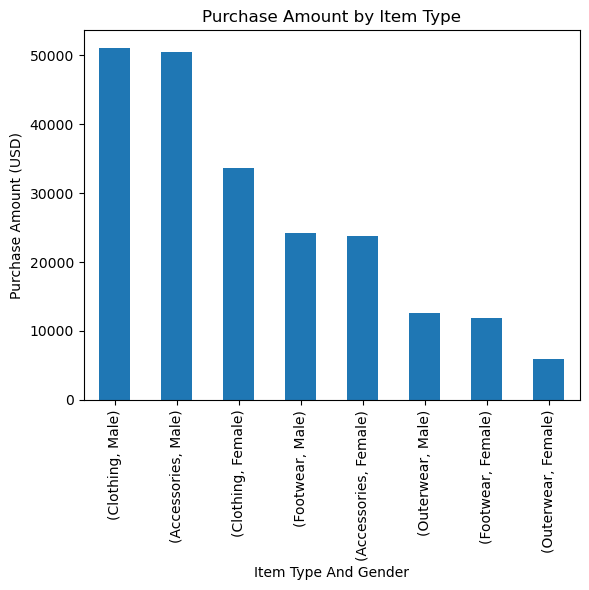

In [17]:
# группирую столбцы "Категория товара" и "Пол покупателя" по сумме покупок
PA_by_category_gender=df.groupby(['Category', 'Gender'])["Purchase Amount (USD)"]
# получившуюся группировку суммирую (по стодбцу с числовыми значениями - сумме покупок) и сортирую по убыванию,методом plot задаю тип графика
PA_by_category_gender.sum().sort_values(ascending=0).plot(kind="bar")
# задаю заголовок
plt.title('Purchase Amount by Item Type')
# подписываю оси
plt.xlabel('Item Type And Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<h4 style="text-align:justify"><i>По данным гистограммы видно, что востребованными товарами среди мужчин и женщин являются одежда и аксессуары.  </i></h4>

<h2 style="text-align:center"><b>Самые популярные вещи среди зрелых мужчин</b></h2>

In [18]:
# Топ-5 популярных вещей среди зрелых мужчи
# Сначала фильтрую данные, оставляя только зрелых мужчин, далее группирую по наименованию товара и считаю количество уникальных покупателей, результат сортирую по убыванию
popular_male_items=df[(df['age_categories'] == 'Mature')  &  (df['Gender'] == 'Male')].groupby(['Item Purchased'])['Customer ID'].count().sort_values(ascending=0)
popular_male_items.head(5)

Item Purchased
Pants      49
Jacket     47
Scarf      46
Sandals    46
Hat        44
Name: Customer ID, dtype: int64

<h4 style="text-align:justify"><i>Данные показывают, что чаще всего зрелые мужчины (в возрасте от 36 до 54 лет) в категории одежды приобретают рубашки, перчатки, шорты и футболки, а в категории аксессуаров - ювелирные изделия и солнцезащитные очки. </i></h4>

<h2 style="text-align:center"><b>Самые популярные вещи среди зрелых женщин</b></h2>

In [19]:
# Топ-5 популярных вещей среди зрелых женщин
popular_female_items=df[(df['age_categories'] == 'Mature')  &  (df['Gender'] == 'Female')].groupby(['Item Purchased'])['Customer ID'].count().sort_values(ascending=0)
popular_female_items.head(5)

Item Purchased
Pants      25
Blouse     24
Hoodie     24
Handbag    23
Scarf      23
Name: Customer ID, dtype: int64

<h4 style="text-align:justify"><i>У женщин той же возрастной категории среди одежды популярными являются брюки, блузки, толстовки и шарфы, а среди аксессуаров - сумки. </i></h4>

<h2 style="text-align:center"><b>Самые частовстречающиеся цвета среди товаров с рейтингом выше четырех для мужчин (по сезонам)</b></h2>

In [20]:
# Сначала фильтрую данные, оставляя в таблице мужчин зрелого возраста, которые поставили оценку выше 4. 
# Далее группирую данные по столбцу "Сезон" и считаю уникальные значения по столбцу "Цвет"
# После сортирую столбец "Цвет" 
test3=df[(df['age_categories'] == 'Mature') & (df["Review Rating"] > 4) & (df["Gender"] == 'Male')].groupby('Season')['Color'].value_counts().sort_values(ascending=0)
test3.head()

Season  Color 
Winter  Black     10
Spring  Gray       9
Fall    Orange     7
        Purple     7
Summer  Yellow     7
Name: count, dtype: int64

<h4 style="text-align:justify"><i>Для мужчин оформить магазины одежды следует в следующие цвета: зимой – черный, весной – серый, летом – желтый, а осенью – оранжевый и фиолетовый.  </i></h4>

<h2 style="text-align:center"><b>Самые частовстречающиеся цвета среди товаров с рейтингом выше четырех для женщин (по сезонам)</b></h2>

In [21]:
# С помощью postgresql запроса, выстроим список с группировкой сезон-> цвета, внутри которой проставим индексы строк, где 1 - наибольшее количество
# вхождений по цвету, и отберем соответствующие строки
query='''with m1 as (
	select "Season" as season, "Color" as color, count("Customer ID"), ROW_NUMBER() OVER(PARTITION BY "Season" order by count("Customer ID") desc)
	from shopping_trends_updated
	where "Review Rating" > 4 and "Gender" = 'Female' and "Age" between 36 and 54
	group by "Season", "Color"
	order by "Season"
)
select season,color,count from m1
where row_number = 1'''
test4 = pd.read_sql(query, connection_string)
test4.head()
# задаю заголовок
#plt.title('Most popular colors for female')
# подписываю оси
#plt.xlabel('Color')
#plt.ylabel('Count')
#plt.show()

,season,color,count
0,Fall,Magenta,7
1,Spring,Peach,3
2,Summer,Gray,5
3,Winter,Cyan,3


<h4 style="text-align:justify"><i>У женщин  пользется спросом одежда таких цветов: зима – голубой, серый и фиолетовый, весна – персиковый, оливковый и бордовый, лето – серый, а осень – пурпурный и темно-бордовый.  </i></h4>

<h2 style="text-align:center"><b>Самые частовстречающиеся размеры одежды с рейтингом выше четырех для мужчин и женщин</b></h2>

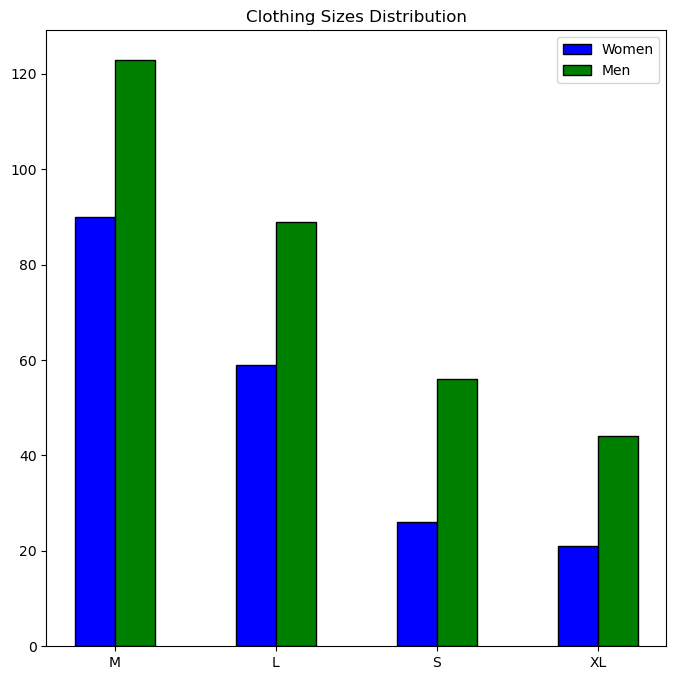

In [22]:
# фильтрую данные: оценка товара > 4, по полу и категории вещи - одежда. Далее по столбцу "Размер" считаю, сколько раз каждый размер встречался 
top_sizes_m = df[(df['Review Rating'] > 4) & (df['Gender'] == 'Male') & (df['Category']=='Clothing')]['Size'].value_counts().sort_values(ascending=0)
top_sizes_f = df[(df['Review Rating'] > 4) & (df['Gender'] == 'Female') & (df['Category']=='Clothing')]['Size'].value_counts().sort_values(ascending=0)
# Строим диаграмму на основе полученых значений
# При помощи метода figure задаю размеры графика
plt.figure(figsize=(8, 8))
# задаю количество рядов
r = np.arange(4) 
# Определяю ширину рядов
width = 0.25
  
# описываю ряды для женщин  
plt.bar(r, top_sizes_f, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Women') 
# описываю ряды для мужчин, при помощи r + width смещаю ряды на ширину столбца
plt.bar(r + width, top_sizes_m, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Men') 
# Задаю заголовок
plt.title('Clothing Sizes Distribution')
# настраиваю разметку и метки оси X на графике. С помощью этого метода можно задать расположение и значения основных и вспомогательных делений на оси X, а также их подписи.
plt.xticks(r + width/2,top_sizes_m.index.tolist()) 
# легенда
plt.legend() 
# Отображаю график
plt.show()

<h4 style="text-align:justify"><i>Самыми распространенными размерами среди популярных вещей с рейтингом выше четырех как для мужчин, так и для женщин оказались размеры M(средний) и L(большой), поэтому стейкхолдерам следует оснащать магазины одеждой этих размеров в большем количестве, чем S (маленький) и XL(очень большой). 
Таким образом, определены наиболее ходовые размеры, которые лучше всего продаются. 
 </i></h4>

<h2 style="text-align:center"><b>Топ-5 самых прибыльныых штатов</b></h2>

In [23]:
# Группирую по шткатам и рассчитываю сумму покупок по ним, сортирую по убыванию
df.groupby(['Location'])["Purchase Amount (USD)"].sum().sort_values(ascending=0).head(5)

Location
Montana       5436
California    5334
Illinois      5332
Idaho         5317
Nevada        5211
Name: Purchase Amount (USD), dtype: int64

<h2 style="text-align:center"><b>Топ-5 наименее прибыльных штатов</b></h2>

In [24]:
# Группирую по шткатам и рассчитываю сумму покупок по ним, сортирую по возрастанию
df.groupby(['Location'])["Purchase Amount (USD)"].sum().sort_values(ascending=1).head(5)

Location
Kansas          3131
Rhode Island    3259
Hawaii          3263
Connecticut     3614
Florida         3622
Name: Purchase Amount (USD), dtype: int64

<h4 style="text-align:justify"><i> Штаты США с наибольшей суммой продаж: Монтана– 5436 USD, Калифорния – 5334 USD и Иллинойс – 5332 USD.Самая маленькая выручка  на Гавайях – 3263 USD, в Род-Айленде – 3259 USD и в Канзасе – 3131 USD. </i></h4>

<h2 style="text-align:center"><b>Cамые востребованные вещи у мужчин по штату Монтана</b></h2>

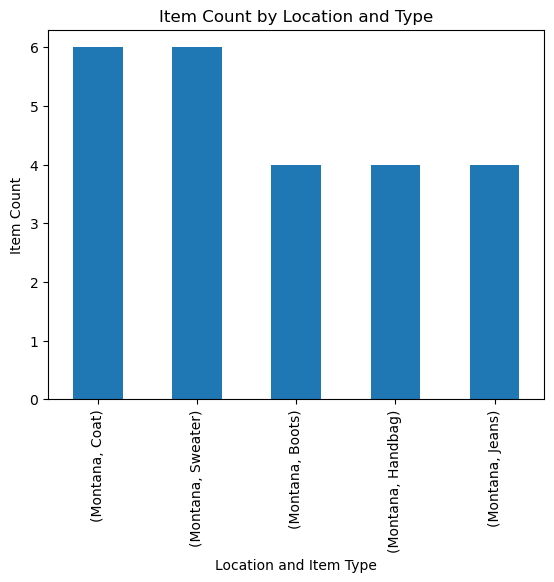

In [25]:
# Сначала фильтрую по штату Монтана и по полу "Мужчины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df['Location']=='Montana') & (df['Gender']=='Male')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h2 style="text-align:center"><b>Cамые востребованные вещи у женщин по штату Монтана</b></h2>

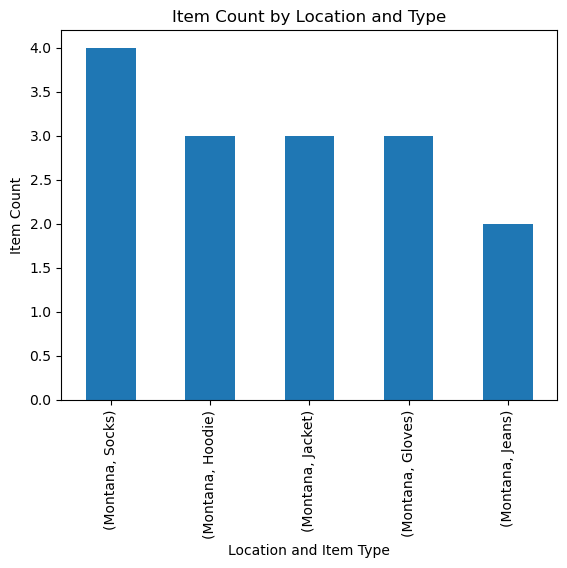

In [26]:
# Сначала фильтрую по штату Монтана и по полу "женщины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df["Location"]=='Montana') & (df["Gender"]=='Female')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h2 style="text-align:center"><b>Cамые востребованные вещи у мужчин по штату Иллиноис</b></h2>

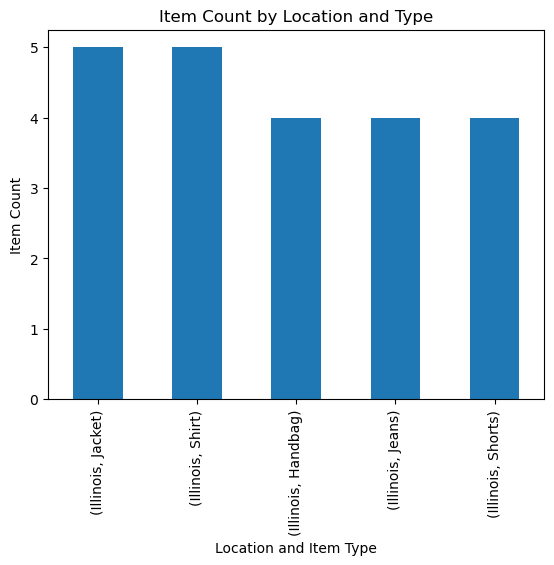

In [27]:
# Сначала фильтрую по штату Иллиноис и по полу "мужчины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df["Location"]=='Illinois') & (df["Gender"]=='Male')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h2 style="text-align:center"><b>Cамые востребованные вещи у женщин по штату Иллиноис</b></h2>

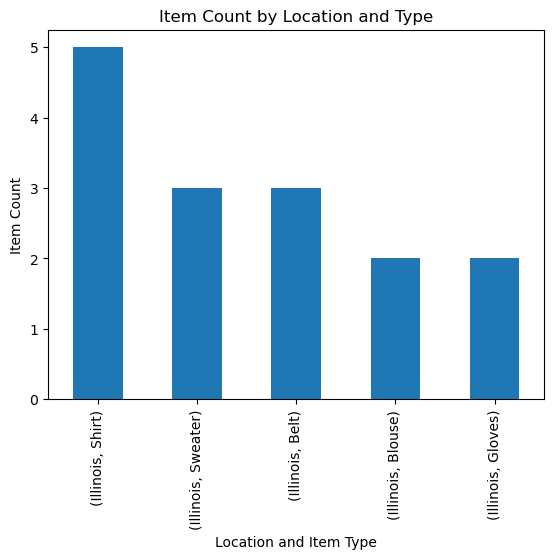

In [28]:
# Сначала фильтрую по штату Иллиноис и по полу "женщины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df["Location"]=='Illinois') & (df["Gender"]=='Female')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h2 style="text-align:center"><b>Cамые востребованные вещи у мужчин по штату Калифорния</b></h2>

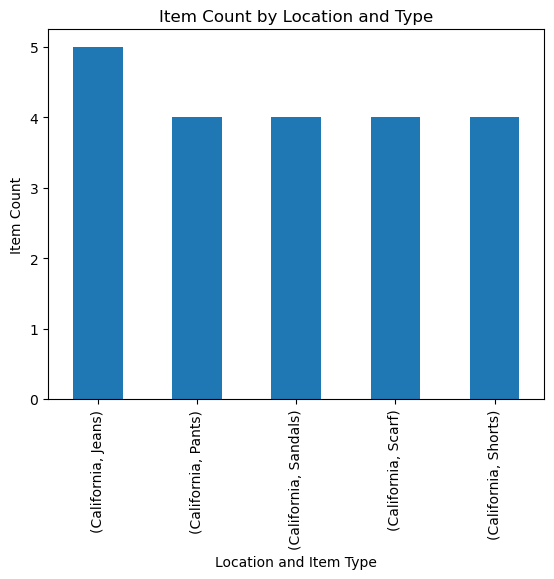

In [29]:
# Сначала фильтрую по штату Калифорния и по полу "мужчины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df["Location"]=='California') & (df["Gender"]=='Male')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h2 style="text-align:center"><b>Cамые востребованные вещи у женщин по штату Калифорния</b></h2>

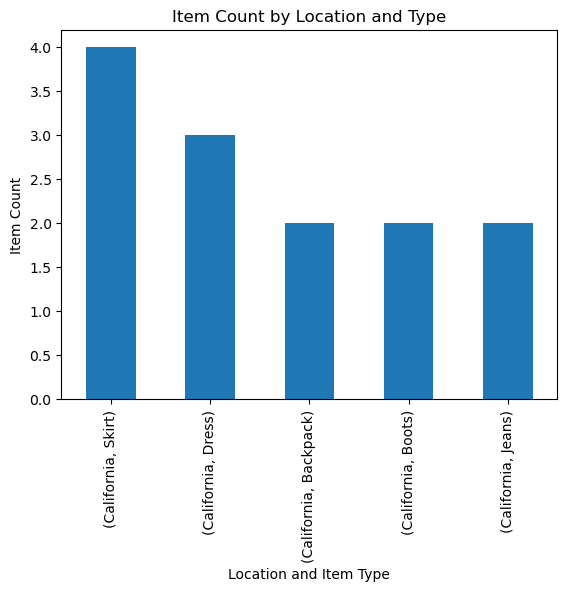

In [30]:
# Сначала фильтрую по штату Калифорния и по полу "женщины". Потом группирую по Штатам. Далее считаю, сколько раз каждая уникальная запись встречаась в наименовании товара, сортирую эти товары по убыванию.
#iloc[:5] - ограничивает выборку первыми пятью элементаи
# plot - метод для построения графика
df[(df["Location"]=='California') & (df["Gender"]=='Female')].groupby(['Location'])["Item Purchased"].value_counts().sort_values(ascending=0).iloc[:5].plot(kind="bar")
# задаю заголовок "Количество покупок по локации и типу"
plt.title('Item Count by Location and Type')
# задаю x "Локации и название вещи"
plt.xlabel('Location and Item Type')
# задаю y "Количество покупок"
plt.ylabel('Item Count')
plt.show()

<h4 style="text-align:justify"><i>В штате Монтана среди мужчин наиболее популярны пальто, свитеры, ботинки, сумки и джинсы. Женщины чаще всего приобретали носки, худи, куртки, перчатки и джинсы.
В Калифорнии мужчины активно покупали джинсы, штаны, сандалии, шарфы и шорты, женщины - юбки, платья, рюкзаки, ботинки и джинсы.
В штате Иллинойс выбор мужчин падал на куртки, рубашки, сумки, джинсы и шорты, женщин – на рубашки, свитеры, пояса, блузки и перчатки.
Стоит заметить, что в исследуемых регионах разные погодные условия, в штатах Монтана и Иллинойс климат умеренно континентальный, поэтому и теплая одежда приобретается в этих регионах чаще. В Калифорнии же субтропики, в связи с этим преобладает летняя, легкая одежда. 
 </i></h4>

<h2 style="text-align:center"><b>ОПРЕДЕЛЕНИЕ ВЗАИМОСВЯЗЕЙ МЕЖДУ ДАННЫМИ</b></h2>

In [31]:
# Создаю функцию, которая возвращает числовые значения(от 0 до 6) вместо текстовых
def func_bin_frequency(row):
    if row['Frequency of Purchases']=='Fortnightly':      # "Раз в две недели" возвращает 0
        return 0
    elif row['Frequency of Purchases']=='Weekly':         # "Еженедельно" возвращает 1 
        return 1
    elif row['Frequency of Purchases']=='Quarterly':       # "Ежеквартально" возвращает 2
        return 2
    elif row['Frequency of Purchases']=='Annually':         # "Ежегодно" возвращает 3
        return 3
    elif row['Frequency of Purchases']=='Bi-Weekly':         # "Раз в две недели" возвращает 4 
        return 4
    elif row['Frequency of Purchases']=='Every 3 Months':      # "Каждые три месяца" возвращает 5
        return 5
    elif row['Frequency of Purchases']=='Monthly':              # "Ежемесячно" возвращает 6
        return 6

In [32]:
# Добавляю новый столбец "Частота покупок (бин)' в таблицу
df['Frequency of Purchases(bin)']= df.apply(func_bin_frequency, axis = 1)

In [33]:
# Функция бинарной классификации по признаку пола
def func_bin_qender(row):
    if row['Gender']=='Male':        # "Мужчина" - возвращает 0
        return 0
    elif row['Gender']=='Female':    # "Женщина" - возвращает 1
        return 1

In [34]:
# Добавление столбца бинарной классификации пола
df['Gender(bin)']= df.apply(func_bin_qender, axis = 1)

<h2 style="text-align:center"><b>Поиск взаимосвязей методом Спирмена</b></h2>

In [35]:
# Тепловая карта будет строиться по всем числовым столбцам в таблице
test2=df[['Purchase Amount (USD)', 'Review Rating', 'Age', 'Previous Purchases','Frequency of Purchases(bin)','Gender(bin)']]
test2.head()

,Purchase Amount (USD),Review Rating,Age,Previous Purchases,Frequency of Purchases(bin),Gender(bin)
1,64,3.1,19,2,0,0
2,73,3.1,50,23,1,0
3,90,3.5,21,49,1,0
5,20,2.9,46,14,1,0
6,85,3.2,63,49,2,0


<Axes: >

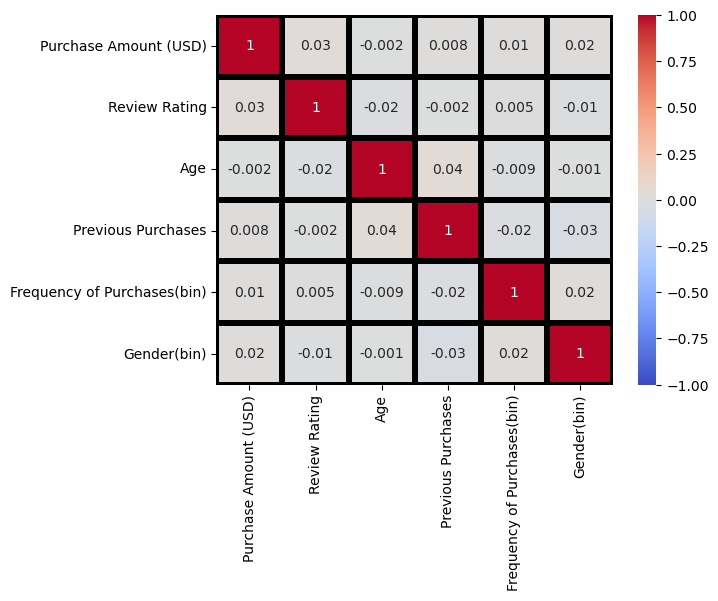

In [36]:
# агрументы: annot -  помогает отобразить на графике коэффициенты корреляции, fmt - отображает кол-во цифр после запятой, vmin - минимальное значение шкалы; vmax - максимальное значение шкалы;cmap - изменить цвет,linewidths и linecolor- толщиной границы и цвет границы
sns.heatmap(test2.corr(method="spearman"),annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')

<h6><i> Взаимосвязь между переменными "Возраст' и "Оценка товара"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Возраст' и "Сумма предыдущих транзакций"  очень слабая, практически отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Оценка товара' и "Сумма покупки"  очень слабая, практически отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Сумма предыдущих транзакций' и "оценка товара"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Сума предыдущих транзакций' и "Сумма плкупки"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Частота покупок (бин)' и "Рейтинг товаров"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Частота покупок (бин)' и "Возраст клиента" отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Частота покупок (бин)' и "Сумма покупки" очень слабая, практически отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Частота покупок (бин)' и "Сумма предыщдущих транзакций" отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Пол (бин)' и "Рейтинг товаров"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Пол (бин)' и "Возраст" отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Пол (бин)' и "Сумма покупки"  очень слабая, практически отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Возраст' и "Сумма покупки"  отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Пол (бин)' и "Частота покупок (бин)"  очень слабая, практически отсутствует. </i></h6>

<h6><i> Взаимосвязь между переменными "Пол (бин)' и "Сумма предыдущих транзакций" отсутствует, близится к обратной. </i></h6>

<h4 style="text-align:justify"><i>На матрице видна очень слабая, практически отсутствующая, взаимосвязь между переменными.
Можно сделать вывод о том, что ключевыми факторами спроса являются тренды и характеристики товаров, а привычки и поведение покупателей субъективны, и в общей массе не позволяют на них ориентироваться.
 </i></h4>

<h2 style="text-align:center"><b>Рекомендации стейкхолдерам</b></h2>

<h4><i>По результатам исследования можно сделать вывод, что для успешного функционирования стейкхолдерам необходимо знать свою целевую аудиторию. Это поможет лучше понять потребности и предпочтения потребителей, повысить лояльность клиентов, выбрать правильные рекламные каналы и обнаружить новые сегменты аудитории, которым может быть интересен товар. <br>
Разработаны следующие рекомендации для магазинов одежды и поставщиков: <br>
- сосредоточить внимание на клиентах в возрасте от 36 до 54 лет; <br>
- обоснованно принимать решения об открытии магазинов на конкретных территориях и отдавать предпочтение штатам с растущей экономикой и высокой покупательной способностью населения, в работе таковыми являются: Монтана, Калифорния и Иллинойс; <br>
- изучать предпочтения населения конкретного региона, так как окружающая среда оказывает фундаментальное значение на формирование как мышления, так и поведения различных сегментов целевой аудитории. Например, продукт, популярный в теплом климате, моэжет оказаться не столь успешным в более холодном климате, и наоборот; <br>
- учитывать влияние трендов и моды на продажи, закупать вещи из новых коллекций. В исследуемом датасете было определено, что в зависимости от времени года предпочтения в цвете одежды у мужчин и женщин меняются; <br>
- правильно подбирать размерную сетку одежды и закупать ходовые размеры в большем количестве. Такими в работе определены размеры M(средний) и L(большой).
 </i></h4>